# Example 4.5: classification of MNIST data

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.datasets import mnist

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import time

## Set the parameters

In [2]:
batch_size = 128
num_classes = 10
no_epochs = 30

tf.random.set_seed(10)

## Read and scale the data

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

## Define the DNN model

In [4]:
# create a multilayer networks
model = Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(625, activation='relu'),
  Dense(100, activation='relu'),
  Dense(10, activation='softmax')
])

# configures the model for training
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Callback to record timing

In [5]:
class TimingCallback(Callback):
    def __init__(self, logs={}):
        self.times=[]
    def on_train_batch_begin(self, batch, logs={}):
        self.starttime = time.time()
    def on_train_batch_end(self, batch, logs={}):
        self.times.append(time.time()-self.starttime)

cb = TimingCallback()

## Train the network

In [6]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=no_epochs,
                    verbose=2,
                    use_multiprocessing=True,
                    callbacks = [cb],
                    validation_data=(x_test, y_test))

Epoch 1/30
469/469 - 3s - loss: 1.0487 - accuracy: 0.7581 - val_loss: 0.4969 - val_accuracy: 0.8820
Epoch 2/30
469/469 - 2s - loss: 0.4320 - accuracy: 0.8876 - val_loss: 0.3525 - val_accuracy: 0.9063
Epoch 3/30
469/469 - 2s - loss: 0.3458 - accuracy: 0.9056 - val_loss: 0.3051 - val_accuracy: 0.9139
Epoch 4/30
469/469 - 3s - loss: 0.3064 - accuracy: 0.9142 - val_loss: 0.2768 - val_accuracy: 0.9237
Epoch 5/30
469/469 - 3s - loss: 0.2811 - accuracy: 0.9210 - val_loss: 0.2582 - val_accuracy: 0.9281
Epoch 6/30
469/469 - 4s - loss: 0.2617 - accuracy: 0.9262 - val_loss: 0.2458 - val_accuracy: 0.9290
Epoch 7/30
469/469 - 3s - loss: 0.2462 - accuracy: 0.9303 - val_loss: 0.2296 - val_accuracy: 0.9356
Epoch 8/30
469/469 - 2s - loss: 0.2330 - accuracy: 0.9343 - val_loss: 0.2181 - val_accuracy: 0.9377
Epoch 9/30
469/469 - 3s - loss: 0.2212 - accuracy: 0.9370 - val_loss: 0.2098 - val_accuracy: 0.9404
Epoch 10/30
469/469 - 4s - loss: 0.2109 - accuracy: 0.9403 - val_loss: 0.2017 - val_accuracy: 0.9417

In [7]:
print('time for a weight update: %g s'%np.average(cb.times))

time for a weight update: 0.00480995 s


## Plot the learning curves

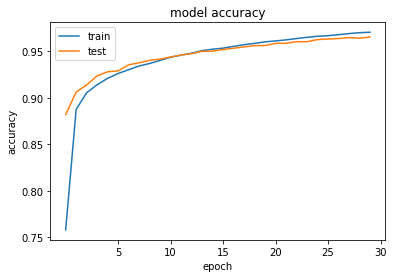

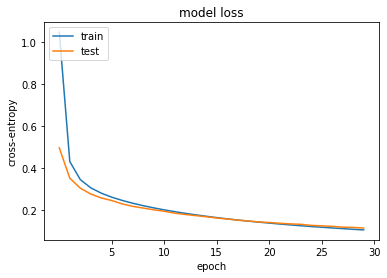

In [8]:
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks([5, 10, 15, 20, 25, 30])
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('figures/4.5a_1.png')

# summarize history for loss
plt.figure(2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('cross-entropy')
plt.xlabel('epoch')
plt.xticks([5, 10, 15, 20, 25, 30])
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('figures/4.5a_2.png')